![Julia logo](images/julia-logo.png)


<div style="text-align: center">

# Getting Started with Julia

## Iowa Code Camp

### December 8, 2018

#### David W. Body

#### Twitter: @david_body

# Looks like Python, feels like Lisp, runs like Fortran

</div>


## Introduction and Background

* Created by Jeff Bezanson, Alan Edelman, Stefan Karpinski, and Viral B. Shah in 2009
* [Released publicly in 2012](https://julialang.org/blog/2012/02/why-we-created-julia)
* [Version 1.0 released August 2018](https://julialang.org/blog/2018/08/one-point-zero)

#### Main language features

* Multiple dispatch (parametric polymorphism)
* Dynamic type system ("optional" typing)
* High performance (approaching C, Fortran, etc.)
* Built-in package manager
* Lisp-like macros and metaprogramming
* Interoperability with Python, R, C, Fortran
* Designed for parallel and distributed computing

Today we're going to just hit a few highlights and just scratch the surface.

Goal is give everyone an idea of what Julia is like so you can decide if you want to learn more.

## Riddler example: Python vs Julia

### Riddler Express

https://fivethirtyeight.com/features/so-you-want-to-tether-your-goat-now-what/

> From Luke Robinson, a serenading stumper:

> My daughter really likes to hear me sing “The Unbirthday Song” from “Alice in Wonderland” to her. She also likes to sing it to other people. Obviously, the odds of my being able to sing it to her on any random day are 364 in 365, because I cannot sing it on her birthday. The question is, though, how many random people would she expect to be able to sing it to on any given day before it became more likely than not that she would encounter someone whose birthday it is? In other words, what is the expected length of her singing streak?

First let's look at a [**Python** simulation](http://localhost:8888/notebooks/Unbirthday%20Riddler%20-%20Python.ipynb) to calculate the approximate expected length of the singing streak.

Then let's compare a **Julia** simulation.

In [1]:
using Formatting
using Statistics

function trial()
    n = 0
    singing = true
    while (singing)
        if (rand(1:365) == 1)
            singing = false
        else
            n += 1
        end
    end
    return n
end

function do_trials(n_trials)
    trials = zeros(Int, n_trials)
    for i in 1:n_trials
        trials[i] = trial()
    end
    mean(trials)
end

do_trials (generic function with 1 method)

In [3]:
@time begin
    n_trials = Int(1e6)
    result = do_trials(n_trials)
    println("Expected number of days: $result")
end

Expected number of days: 364.068123
  3.247938 seconds (39 allocations: 7.630 MiB)


-------------

#### A better (exact) solution

The [Geometric distrubution](https://en.wikipedia.org/wiki/Geometric_distribution) is the probability distribution of the number $Y$ of failures of Bernoulli trials before the first success. The probability mass function for the Geometric distribution is

$${\Pr(Y=k)=(1-p)^{k}p}$$

for k = 0, 1, 2, 3, .... where $p$ is probability of success for each Bernoulli trial.

The mean of the Geometric distribution is

$$E(Y) = \frac{1 - p}{p}$$

In our case, $p$ is the probability that a random person we encounter has a birthday today, so

$$p = \frac{1}{365}$$

and therefore

$$E(Y) = \frac{1 - \frac{1}{365}}{\frac{1}{365}}$$

$$ = \frac{365 - \frac{365}{365}}{\frac{365}{365}}$$

$$ = 365 - 1$$

$$ = 364$$

# Selected Julia language features

There is a lot more than we can cover today.

## Variables

In [4]:
x = 1
y = 2
x + y

3

### Unicode and LaTeX variable names

In [5]:
# Korean
안녕하세요 = "Hello"

"Hello"

In [6]:
α = 1.0
β₁ = 2.0
β₂ = 3.0

α + β₁ * 5.0 + β₂ * 3.5

21.5

In [7]:
π

π = 3.1415926535897...

### Even emojis

Please don't ever do this. 😉

In [8]:
😺 = "Smiley cat"

"Smiley cat"

In [9]:
typeof(😺)

String

In [10]:
😺 = 1

1

In [11]:
typeof(😺)

Int64

In [12]:
😀 = 0
😞 = -1

-1

In [13]:
😺 + 😞 == 😀

true

### Aside

In [15]:
0.1 + 0.2 == 0.3

false

In [16]:
0.1 + 0.2 ≈ 0.3

true

# Selected data structures

1. Tuples
2. Dictionaries
3. Arrays


### Tuples

In [18]:
my_favorite_languages = ("Julia", "Python", "R")

("Julia", "Python", "R")

In [19]:
my_favorite_languages[1]

"Julia"

Tuples are immutable, so it's an error to try this:

In [20]:
my_favorite_languages[3] = "Ruby"

MethodError: MethodError: no method matching setindex!(::Tuple{String,String,String}, ::String, ::Int64)

### Dictionaries

In [21]:
d1 = Dict(1 => 4.2, 2 => 5.3)

Dict{Int64,Float64} with 2 entries:
  2 => 5.3
  1 => 4.2

In [22]:
keys(d1)

Base.KeySet for a Dict{Int64,Float64} with 2 entries. Keys:
  2
  1

In [23]:
values(d1)

Base.ValueIterator for a Dict{Int64,Float64} with 2 entries. Values:
  5.3
  4.2

In [24]:
d2 = Dict(1 => 4.2, :two => "hello") 

Dict{Any,Any} with 2 entries:
  :two => "hello"
  1    => 4.2

In [25]:
d2["whatever"] = true
d2

Dict{Any,Any} with 3 entries:
  "whatever" => true
  :two       => "hello"
  1          => 4.2

We can be explict about types.

In [26]:
d3 = Dict{Symbol, Int64}(:a => 1, :b => 2, :c => 3)

Dict{Symbol,Int64} with 3 entries:
  :a => 1
  :b => 2
  :c => 3

Being explicit about types helps prevent certain kinds of bugs and also generally improves performance.

This will be an error because the types don't match.

In [28]:
d3["whatever"] = true

MethodError: MethodError: Cannot `convert` an object of type String to an object of type Symbol
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T at essentials.jl:154
  Symbol(::String) at boot.jl:425
  Symbol(::AbstractString) at strings/basic.jl:205
  ...

### Arrays

In [29]:
fibonacci = [1, 1, 2, 3, 5, 8, 13]

7-element Array{Int64,1}:
  1
  1
  2
  3
  5
  8
 13

In [30]:
mixture = [1, 1, 2, 3, "Ted", "Robyn"]

6-element Array{Any,1}:
 1       
 1       
 2       
 3       
  "Ted"  
  "Robyn"

In [31]:
push!(fibonacci, 21)

8-element Array{Int64,1}:
  1
  1
  2
  3
  5
  8
 13
 21

In [32]:
fibonacci

8-element Array{Int64,1}:
  1
  1
  2
  3
  5
  8
 13
 21

In [33]:
pop!(fibonacci)

21

In [34]:
fibonacci

7-element Array{Int64,1}:
  1
  1
  2
  3
  5
  8
 13

Assigment is by reference, so be careful.

In [35]:
somenumbers = fibonacci
somenumbers[3] = 999

999

In [36]:
fibonacci

7-element Array{Int64,1}:
   1
   1
 999
   3
   5
   8
  13

To avoid this, use the ```copy``` function.

Multiple dimensional arrays are also supported.

In [37]:
rand(4, 3)

4×3 Array{Float64,2}:
 0.589056   0.518406  0.50565  
 0.994593   0.141728  0.500289 
 0.0623843  0.433537  0.879642 
 0.118884   0.258943  0.0844334

In [38]:
rand(3, 2, 3)

3×2×3 Array{Float64,3}:
[:, :, 1] =
 0.491437  0.942852
 0.182151  0.220193
 0.820267  0.817548

[:, :, 2] =
 0.640791  0.34664 
 0.730893  0.868912
 0.489575  0.877053

[:, :, 3] =
 0.605931  0.134037
 0.977357  0.579976
 0.461687  0.957947

# Control Flow

* Loops
* Array comprehensions

## Loops

### while loop

In [39]:
n = 0
while n < 5
    n += 1
    println(n)
end
n

1
2
3
4
5


5

### for loop

In [40]:
for n in 1:5
    println(n)
end

1
2
3
4
5


Let's create an addition table using some syntactic sugar for a nested for loop.

In [41]:
m, n = 5, 5
A = fill(0, (m, n))

5×5 Array{Int64,2}:
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0

In [42]:
for i in 1:m, j in 1:n
    A[i, j] = i + j
end
A

5×5 Array{Int64,2}:
 2  3  4  5   6
 3  4  5  6   7
 4  5  6  7   8
 5  6  7  8   9
 6  7  8  9  10

## Array comprehensions

Here is the same thing in more idiomatic Julia using an *array comprehension*.

In [43]:
B = [i + j for i in 1:m, j in 1:n]

5×5 Array{Int64,2}:
 2  3  4  5   6
 3  4  5  6   7
 4  5  6  7   8
 5  6  7  8   9
 6  7  8  9  10

# Functions

This section is from Jane Herriman's [Introduction to Julia Tutorials](https://github.com/xorJane/Introduction_to_Julia_tutorials)

Topics:
1. How to declare a function
2. Duck-typing in Julia
3. Mutating vs. non-mutating functions
4. Some higher order functions

## How to declare a function
Julia gives us a few different ways to write a function. The first requires the `function` and `end` keywords

In [45]:
function sayhi(name)
    println("Hi $name, it's great to see you!")
end

sayhi (generic function with 1 method)

In [46]:
function f(x)
    x^2
end

f (generic function with 1 method)

We can call either of these functions like this:

In [47]:
sayhi("C-3PO")

Hi C-3PO, it's great to see you!


In [48]:
f(42)

1764

Alternatively, we could have declared either of these functions in a single line

In [49]:
sayhi2(name) = println("Hi $name, it's great to see you!")

sayhi2 (generic function with 1 method)

In [50]:
f2(x) = x^2

f2 (generic function with 1 method)

In [51]:
sayhi2("R2D2")

Hi R2D2, it's great to see you!


In [52]:
f2(42)

1764

Finally, we could have declared these as "anonymous" functions

In [53]:
sayhi3 = name -> println("Hi $name, it's great to see you!")

#5 (generic function with 1 method)

In [54]:
f3 = x -> x^2

#7 (generic function with 1 method)

In [55]:
sayhi3("Chewbacca")

Hi Chewbacca, it's great to see you!


In [56]:
f3(42)

1764

In [58]:
(x -> x^3)(3)

27

## Duck-typing in Julia
*"If it quacks like a duck, it's a duck."* <br><br>
Julia functions will just work on whatever inputs make sense. <br><br>
For example, `sayhi` works on the name of this minor tv character, written as an integer...

In [59]:
sayhi(55595472)

Hi 55595472, it's great to see you!


And `f` will work on a matrix. 

In [60]:
A = rand(3, 3)
A

3×3 Array{Float64,2}:
 0.411648  0.547844  0.0666866
 0.727199  0.489917  0.785291 
 0.332148  0.222251  0.880756 

In [61]:
f(A)

3×3 Array{Float64,2}:
 0.589996  0.508739  0.516403
 0.916451  0.812943  1.12487 
 0.590891  0.4866    0.972414

`f` will also work on a string like "hi" because `*` is defined for string inputs as string concatenation.

In [62]:
f("hi")

"hihi"

On the other hand, `f` will not work on a vector. Unlike `A^2`, which is well-defined, the meaning of `v^2` for a vector, `v`, is not a well-defined algebraic operation. 

In [63]:
v = rand(3)

3-element Array{Float64,1}:
 0.5424294202504814
 0.4476956147749789
 0.9015233612379583

In [64]:
f(v)

MethodError: MethodError: no method matching ^(::Array{Float64,1}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:795
  ^(!Matched::Missing, ::Integer) at missing.jl:120
  ^(!Matched::Missing, ::Number) at missing.jl:93
  ...

## Mutating vs. non-mutating functions

By convention, functions followed by `!` alter their contents and functions lacking `!` do not.

For example, let's look at the difference between `sort` and `sort!`.


In [65]:
v = [3, 5, 2]

3-element Array{Int64,1}:
 3
 5
 2

In [66]:
sort(v)

3-element Array{Int64,1}:
 2
 3
 5

In [67]:
v

3-element Array{Int64,1}:
 3
 5
 2

`sort(v)` returns a sorted array that contains the same elements as `v`, but `v` is left unchanged. <br><br>

On the other hand, when we run `sort!(v)`, the contents of v are sorted within the array `v`.

In [68]:
sort!(v)

3-element Array{Int64,1}:
 2
 3
 5

In [69]:
v

3-element Array{Int64,1}:
 2
 3
 5

## Some higher order functions

### map

`map` is a "higher-order" function in Julia that *takes a function* as one of its input arguments. 
`map` then applies that function to every element of the data structure you pass it. For example, executing

```julia
map(f, [1, 2, 3])
```
will give you an output array where the function `f` has been applied to all elements of `[1, 2, 3]`
```julia
[f(1), f(2), f(3)]
```

In [70]:
map(f, [1, 2, 3])

3-element Array{Int64,1}:
 1
 4
 9

Here we've squared all the elements of the vector `[1, 2, 3]`, rather than squaring the vector `[1, 2, 3]`.

To do this, we could have passed to `map` an anonymous function rather than a named function, such as

In [71]:
x -> x^3

#11 (generic function with 1 method)

via

In [72]:
map(x -> x^3, [1, 2, 3])

3-element Array{Int64,1}:
  1
  8
 27

and now we've cubed all the elements of `[1, 2, 3]`!

### broadcast

`broadcast` is another higher-order function like `map`. `broadcast` is a generalization of `map`, so it can do every thing `map` can do and more. The syntax for calling `broadcast` is the same as for calling `map`

In [73]:
broadcast(f, [1, 2, 3])

3-element Array{Int64,1}:
 1
 4
 9

and again, we've applied `f` (squared) to all the elements of `[1, 2, 3]` - this time by "broadcasting" `f`!

Some syntactic sugar for calling `broadcast` is to place a `.` between the name of the function you want to `broadcast` and its input arguments. For example,

```julia
broadcast(f, [1, 2, 3])
```
is the same as
```julia
f.([1, 2, 3])
```

In [74]:
f.([1, 2, 3])

3-element Array{Int64,1}:
 1
 4
 9

Notice again how different this is from calling 
```julia
f([1, 2, 3])
```
We can square every element of a vector, but we can't square a vector!

To drive home the point, let's look at the difference between

```julia
f(A)
```
and
```julia
f.(A)
```
for a matrix `A`:

In [75]:
A = [i + 3*j for j in 0:2, i in 1:3]

3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 7  8  9

In [76]:
f(A)

3×3 Array{Int64,2}:
  30   36   42
  66   81   96
 102  126  150

As before we see that for a matrix, `A`,
```
f(A) = A^2 = A * A
``` 

On the other hand,

In [77]:
B = f.(A)

3×3 Array{Int64,2}:
  1   4   9
 16  25  36
 49  64  81

contains the squares of all the entries of `A`.

This dot syntax for broadcasting allows us to write relatively complex compound elementwise expressions in a way that looks natural/closer to mathematical notation. For example, we can write

In [78]:
A .+ 2 .* f.(A) ./ A

3×3 Array{Float64,2}:
  3.0   6.0   9.0
 12.0  15.0  18.0
 21.0  24.0  27.0

instead of

In [79]:
broadcast(x -> x + 2 * f(x) / x, A)

3×3 Array{Float64,2}:
  3.0   6.0   9.0
 12.0  15.0  18.0
 21.0  24.0  27.0

and the two will perform exactly the same.

# Type system and multiple dispatch

This section is also from Jane Herriman's [Introduction to Julia Tutorials](https://github.com/xorJane/Introduction_to_Julia_tutorials)

In this notebook we'll explore **multiple dispatch**, which is a key feature of Julia.

Multiple dispatch makes software *generic* and *fast*!

#### Starting with the familiar

To understand multiple dispatch in Julia, let's start with what we've already seen.

We can declare functions in Julia without giving Julia any information about the types of the input arguments that function will receive:

In [80]:
f(x) = x^2

f (generic function with 1 method)

and then Julia will determine on its own which input argument types make sense and which do not:

In [81]:
f(10)

100

In [82]:
f([1, 2, 3])

MethodError: MethodError: no method matching ^(::Array{Int64,1}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:795
  ^(!Matched::Missing, ::Integer) at missing.jl:120
  ^(!Matched::Missing, ::Number) at missing.jl:93
  ...

#### Specifying the types of our input arguments

However, we also have the *option* to tell Julia explicitly what types our input arguments are allowed to have.

For example, let's write a function `foo` that only takes strings as inputs.

In [83]:
foo(x::String, y::String) = println("My inputs x and y are both strings!")

foo (generic function with 1 method)

We see here that in order to restrict the type of `x` and `y` to `String`s, we just follow the input argument name by a double colon and the keyword `String`.

Now we'll see that `foo` works on `String`s and doesn't work on other input argument types.

In [84]:
foo("hello", "hi!")

My inputs x and y are both strings!


In [85]:
foo(3, 4)

MethodError: MethodError: no method matching foo(::Int64, ::Int64)

To get `foo` to work on integer (`Int`) inputs, let's tack `::Int` onto our input arguments when we declare `foo`.

In [86]:
foo(x::Int, y::Int) = println("My inputs x and y are both integers!")

foo (generic function with 2 methods)

In [87]:
foo(3, 4)

My inputs x and y are both integers!


Now `foo` works on integers! But look, `foo` also still works when `x` and `y` are strings!

In [88]:
foo("hello", "hi!")

My inputs x and y are both strings!


This is starting to get to the heart of multiple dispatch. When we declared

```julia
foo(x::Int, y::Int) = println("My inputs x and y are both integers!")
```
we didn't overwrite or replace
```julia
foo(y::String, y::String)```

Instead, we just added an additional ***method*** to the ***generic function*** called `foo`.

A ***generic function*** is the abstract concept associated with a particular operation.

For example, the generic function `+` represents the concept of addition.

A ***method*** is a specific implementation of a generic function for *particular argument types*.

For example, `+` has methods that accept floating point numbers, integers, matrices, etc.

We can use the `methods` to see how many methods there are for `foo`.

In [89]:
methods(foo)

# 2 methods for generic function "foo":
[1] foo(x::Int64, y::Int64) in Main at In[86]:1
[2] foo(x::String, y::String) in Main at In[83]:1

Aside: how many methods do you think there are for addition?

In [90]:
methods(+)

# 163 methods for generic function "+":
[1] +(x::Bool, z::Complex{Bool}) in Base at complex.jl:277
[2] +(x::Bool, y::Bool) in Base at bool.jl:104
[3] +(x::Bool) in Base at bool.jl:101
[4] +(x::Bool, y::T) where T<:AbstractFloat in Base at bool.jl:112
[5] +(x::Bool, z::Complex) in Base at complex.jl:284
[6] +(a::Float16, b::Float16) in Base at float.jl:392
[7] +(x::Float32, y::Float32) in Base at float.jl:394
[8] +(x::Float64, y::Float64) in Base at float.jl:395
[9] +(z::Complex{Bool}, x::Bool) in Base at complex.jl:278
[10] +(z::Complex{Bool}, x::Real) in Base at complex.jl:292
[11] +(::Missing, ::Missing) in Base at missing.jl:92
[12] +(::Missing) in Base at missing.jl:79
[13] +(::Missing, ::Number) in Base at missing.jl:93
[14] +(level::Base.CoreLogging.LogLevel, inc::Integer) in Base.CoreLogging at logging.jl:106
[15] +(c::BigInt, x::BigFloat) in Base.MPFR at mpfr.jl:353
[16] +(a::BigInt, b::BigInt, c::BigInt, d::BigInt, e::BigInt) in Base.GMP at gmp.jl:443
[17] +(a::BigInt, b::BigInt, c::BigInt, d::BigInt) in Base.GMP at gmp.jl:442
[18] +(a::BigInt, b::BigInt, c::BigInt) in Base.GMP at gmp.jl:441
[19] +(x::BigInt, y::BigInt) in Base.GMP at gmp.jl:412
[20] +(x::BigInt, c::Union{UInt16, UInt32, UInt64, UInt8}) in Base.GMP at gmp.jl:449
[21] +(x::BigInt, c::Union{Int16, Int32, Int64, Int8}) in Base.GMP at gmp.jl:455
[22] +(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat, e::BigFloat) in Base.MPFR at mpfr.jl:503
[23] +(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat) in Base.MPFR at mpfr.jl:496
[24] +(a::BigFloat, b::BigFloat, c::BigFloat) in Base.MPFR at mpfr.jl:490
[25] +(x::BigFloat, c::BigInt) in Base.MPFR at mpfr.jl:349
[26] +(x::BigFloat, y::BigFloat) in Base.MPFR at mpfr.jl:318
[27] +(x::BigFloat, c::Union{UInt16, UInt32, UInt64, UInt8}) in Base.MPFR at mpfr.jl:325
[28] +(x::BigFloat, c::Union{Int16, Int32, Int64, Int8}) in Base.MPFR at mpfr.jl:333
[29] +(x::BigFloat, c::Union{Float16, Float32, Float64}) in Base.MPFR at mpfr.jl:341
[30] +(x::Dates.CompoundPeriod, y::Dates.CompoundPeriod) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/periods.jl:355
[31] +(x::Dates.CompoundPeriod, y::Dates.Period) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/periods.jl:353
[32] +(x::Dates.CompoundPeriod, y::Dates.TimeType) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/periods.jl:391
[33] +(x::Dates.Date, y::Dates.Day) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:78
[34] +(x::Dates.Date, y::Dates.Week) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:76
[35] +(dt::Dates.Date, z::Dates.Month) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:59
[36] +(dt::Dates.Date, y::Dates.Year) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:32
[37] +(dt::Dates.Date, t::Dates.Time) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:20
[38] +(t::Dates.Time, dt::Dates.Date) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:24
[39] +(x::Dates.Time, y::Dates.TimePeriod) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:82
[40] +(dt::Dates.DateTime, z::Dates.Month) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:52
[41] +(dt::Dates.DateTime, y::Dates.Year) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:28
[42] +(x::Dates.DateTime, y::Dates.Period) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:80
[43] +(B::BitArray{2}, J::LinearAlgebra.UniformScaling) 

So, we now can call `foo` on integers or strings. When you call `foo` on a particular set of arguments, Julia will infer the types of the inputs and dispatch the appropriate method. *This* is multiple dispatch.

Multiple dispatch makes our code generic and fast. Our code can be generic and flexible because we can write code in terms of abstract operations such as addition and multiplication, rather than in terms of specific implementations. At the same time, our code runs quickly because Julia is able to call efficient methods for the relevant types.

To see which method is being dispatched when we call a generic function, we can use the @which macro:

In [91]:
@which foo(3, 4)

foo(x::Int64, y::Int64) in Main at In[86]:1

Let's see what happens when we use `@which` with the addition operator!

In [92]:
@which 3.0 + 3.0

+(x::Float64, y::Float64) in Base at float.jl:395

And we can continue to add other methods to our generic function `foo`. Let's add one that takes the ***abstract type*** `Number`, which includes subtypes such as `Int`, `Float64`, and other objects you would think of as numbers:

In [93]:
foo(x::Number, y::Number) = println("My inputs x and y are both numbers!")

foo (generic function with 3 methods)

This method for `foo` will work on, for example, floating point numbers:

In [94]:
foo(3.0, 4.0)

My inputs x and y are both numbers!


We can also add a fallback, duck-typed method for `foo` that takes inputs of any type:

In [95]:
foo(x, y) = println("I accept inputs of any type!")

foo (generic function with 4 methods)

Given the methods we've already written for `foo` so far, this method will be called whenever we pass non-numbers to `foo`:

In [96]:
v = rand(3)
foo(v, v)

I accept inputs of any type!


# Metaprogramming

From Wikipedia:

> In computer programming, **homoiconicity** (from the Greek words homo- meaning "the same" and icon meaning "representation") is a property of some programming languages. A language is **homoiconic** if a program written in it can be manipulated as data using the language, and thus the program's internal representation can be inferred just by reading the program itself. For example, a Lisp program is written as a regular Lisp list, and can be manipulated by other Lisp code.[1] In homoiconic languages, all code can be accessed and transformed as data, using the same representation. This property is often summarized by saying that the language treats "code as data".

Julia is homoiconic. In Julia, program code can be represented by a Julia data structure called an expression.

In [97]:
Meta.parse("2 + 3")

:(2 + 3)

In [98]:
typeof(ans)

Expr

In [99]:
two_plus_three = :(2 + 3)

:(2 + 3)

This is known as *quoting* and `:` is the `quote` operator.

Code with more than one line can be quoted like this:

In [100]:
quote
    a = 42
    b = a^2
    a - b
end

quote
    #= In[100]:2 =#
    a = 42
    #= In[100]:3 =#
    b = a ^ 2
    #= In[100]:4 =#
    a - b
end

In [101]:
eval(two_plus_three)

5

In [102]:
dump(two_plus_three)

Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol +
    2: Int64 2
    3: Int64 3


`head` indicates that this expression is a function call. `args` is an array containing the function and its arguments.

In [103]:
two_plus_three.args[1]

:+

Let's make a copy of the expression and modify the first `arg`

In [104]:
two_minus_three = copy(two_plus_three)
two_minus_three.args[1] = :-

:-

In [105]:
two_plus_three

:(2 + 3)

Now we can look at and evaluate the modified expression.

In [106]:
two_minus_three

:(2 - 3)

In [107]:
eval(two_minus_three)

-1

## Macro example

Using the above and just a little more metaprogramming machinery, we can create powerful *macros*.

Here is an example.

In [109]:
macro timeit(ex)
    quote
        local t0 = time()
        local val = $(esc(ex))
        local t1 = time()
        println("elapsed time: ", t1-t0, " seconds")
        val
    end
end

@timeit (macro with 1 method)

In [112]:
@timeit factorial(20)

elapsed time: 2.86102294921875e-6 seconds


2432902008176640000

Note: Julia comes with a built-in `@time` macro.

In [111]:
@time factorial(20)

  0.000002 seconds (5 allocations: 176 bytes)


2432902008176640000

# Parallel computing

Another Riddler

https://fivethirtyeight.com/features/so-you-want-to-tether-your-goat-now-what/

## Riddler Classic

From Moritz Hesse, some grazing geometry:

> A farmer owns a circular field with radius R. If he ties up his goat to the fence that runs along the edge of the field, how long does the goat’s tether need to be so that the goat can graze on exactly half of the field, by area?

> (The great thing about this puzzle, Moritz notes, is that if you get sick of math, you can find the answer through trial and error with your own circular field and your favorite goat, horse, cow, kangaroo, sheep, unicorn, centaur or sphinx.)

In [115]:
function randPoint()
    # randr = rand()
    randr = sqrt(rand())
    theta = rand() * 2 * π
    randr * cos(theta), randr * sin(theta)
end

function grazeable(x, y, r)
    (x - 1)^2 + y^2 <= r^2
end

function trial(n, r)
    grazeables = 0
    for i = 1:n
        x, y = randPoint()
        grazeables += grazeable(x, y, r) ? 1 : 0
    end
    grazeables / n
end

trial (generic function with 2 methods)

As the following plot will show, there is subtle but fatal flaw with this implementation.

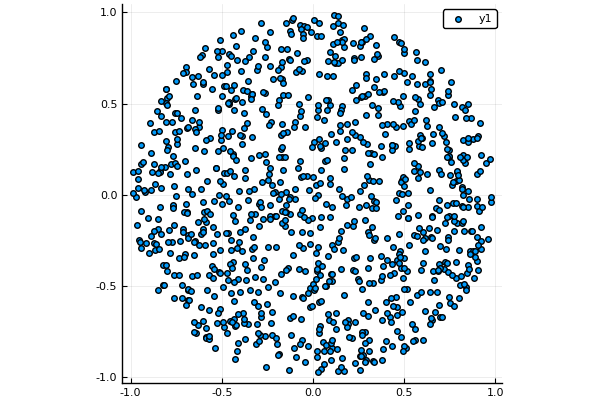

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [116]:
using Plots
pyplot()

points = [randPoint() for p in 1:1e3]
x = [p[1] for p in points]
y = [p[2] for p in points]

scatter(x, y, aspect_ratio = 1)

As explained [here](https://programming.guide/random-point-within-circle.html), to generate random points uniformly over a circle, the radius should be the **square root** of a uniformly randomly distributed number.

Let's fix that and try again, this time coloring points that grazeable.

In [119]:
tether_length = 1.5

points = [randPoint() for p in 1:1e3]
g = [grazeable(p[1], p[2], tether_length) ? "green" : "white" for p in points];
x = [p[1] for p in points]
y = [p[2] for p in points];

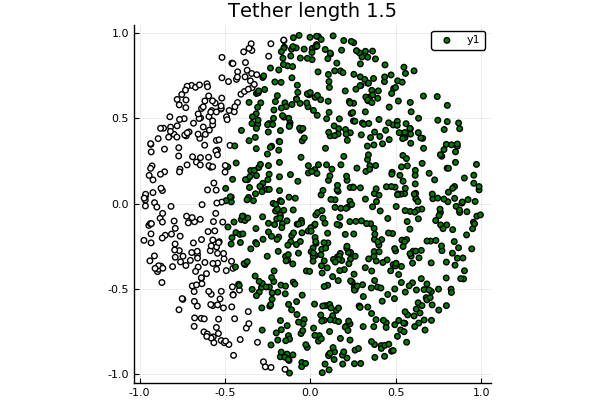

In [120]:
scatter(x, y, c = g, aspect_ratio = 1, title = "Tether length $tether_length")

We "solve" for tether length by trying different values until we get a result that is a close to 0.5 as we can get.

In [121]:
using Formatting

In [122]:
tether_length = 1.0

n_trials = 1e5
println("Performing ", format(n_trials, commas = true), " trials...")

println(trial(n_trials, tether_length))

Performing 100,000 trials...
0.38926


In [123]:
# Solution is ~ 1.159
tether_length = 1.159

n_trials = 1e9
println("Performing ", format(n_trials, commas = true), " trials...")

@time trial(n_trials, tether_length)

Performing 1,000,000,000 trials...
 27.878984 seconds (5 allocations: 176 bytes)


0.500168051

To speed this up, we can parallelize the computation using functionality in Julia's standard library.

In [124]:
using Distributed

In [125]:
nprocs()

1

In [126]:
addprocs(4)

4-element Array{Int64,1}:
 2
 3
 4
 5

In [127]:
@everywhere function randPoint()
    randr = sqrt(rand())
    theta = rand() * 2 * π
    randr * cos(theta), randr * sin(theta)
end

@everywhere function grazeable(x, y, r)
    (x - 1)^2 + y^2 <= r^2
end

@everywhere function trial(n, r)
    grazeables = @distributed (+) for i = 1:n
        x, y = randPoint()
        grazeable(x, y, r) ? 1 : 0
    end
    grazeables / n
end


In [129]:
n_trials = 1e9
println("Performing ", format(n_trials, commas = true), " trials using ", nprocs(), " processes...")

# Solution is ~ 1.159
@time println(trial(n_trials, 1.159))

Performing 1,000,000,000 trials using 5 processes...
0.500188854
 12.158288 seconds (971 allocations: 59.734 KiB)


Now let's plot a diagram of our solution.

This time we'll call PyPlot directly using Julia's PyCall package.

In [130]:
using PyPlot
using PyCall
@pyimport matplotlib.patches as patch

In [131]:
tether_length = 1.159

1.159

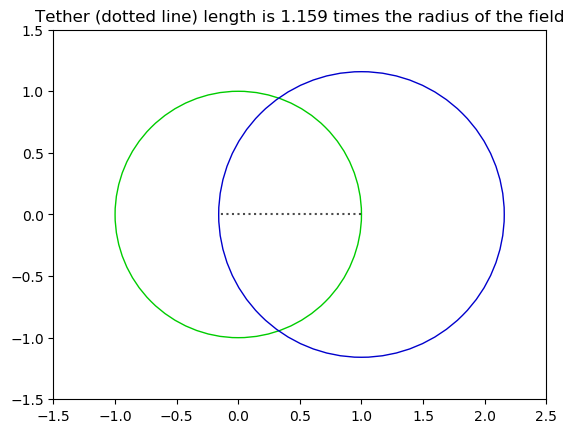

PyObject Text(0.5, 1.0, 'Tether (dotted line) length is 1.159 times the radius of the field')

In [132]:
fix, ax = subplots()

field_circle = patch.Circle((0, 0), 1, facecolor = "none", edgecolor = (0, 0.8, 0))
goat_circle = patch.Circle((1, 0), tether_length, facecolor = "none", edgecolor = (0, 0, 0.8))

ax[:add_patch](field_circle)
ax[:add_patch](goat_circle)

ax[:plot]((1, 1 - tether_length), (0, 0), color = "black", alpha = 0.7, linestyle = ":")

ax[:set_aspect](1.0)
ax[:set_xlim](-1.5, 2.5)
ax[:set_ylim](-1.5, 1.5)

ax[:set_title]("Tether (dotted line) length is $tether_length times the radius of the field")